In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_csvs(path, start=1, end=100):
	files = [path+"r"+str(i)+".csv" for i in range(start,end+1)]
	df = pd.concat((pd.read_csv(f) for f in files))
	df["id"] = list(range(1,end+1))
	return df

In [3]:
def append_run_info(df, agent, budget):
	df["agent"] = agent
	df["budget"] = budget
	return df

In [4]:
base_path='~/Desktop/Simulazioni/ntbea/data/SB/SSPP/'
paths = (base_path+"pdnn10/100/",
         base_path+"pdnn10/1000/",
         base_path+"pdnn10/10000/",
         base_path+"pdnn10(1N)/100/",
         base_path+"pdnn10(1N)/1000/",
         base_path+"pdnn10(1N)/10000/",
         base_path+"pdnn10(1N)/100000/",
         base_path+"pdnn5/100/",
         base_path+"pdnn5/1000/",
         base_path+"pdnn5/10000/",
         base_path+"pdnn5/100000/",
         base_path+"pdnn5(1N)/100/",
         base_path+"pdnn5(1N)/1000/",
         base_path+"pdnn5(1N)/10000/",
         base_path+"pdnn5(1N)/100000/",
         base_path+"pdnn1/100/",
         base_path+"pdnn1/1000/",
         base_path+"pdnn1/10000/",
         base_path+"pdnn1/100000/",
         base_path+"pdnn1(1N)/100/",
         base_path+"pdnn1(1N)/1000/",
         base_path+"pdnn1(1N)/10000/",
         base_path+"pdnn1(1N)/100000/",
         base_path+"lin/100/",
         base_path+"lin/1000/",
         base_path+"lin/10000/",
         base_path+"lin/100000/")
agents = ("pdnn10","pdnn10","pdnn10",
          "pdnn10(1N)","pdnn10(1N)","pdnn10(1N)","pdnn10(1N)",
          "pdnn5","pdnn5","pdnn5","pdnn5",
          "pdnn5(1N)","pdnn5(1N)","pdnn5(1N)","pdnn5(1N)",
          "pdnn1","pdnn1","pdnn1","pdnn1",
          "pdnn1(1N)","pdnn1(1N)","pdnn1(1N)","pdnn1(1N)",
          "lin","lin","lin","lin")
budgets = (10E2, 10E3, 10E4,
           10E2, 10E3, 10E4,10E5,
           10E2, 10E3, 10E4,10E5,
           10E2, 10E3, 10E4,10E5,
           10E2, 10E3, 10E4,10E5,
           10E2, 10E3, 10E4,10E5,
           10E2, 10E3, 10E4,10E5)

In [5]:
data = pd.concat([ append_run_info(load_csvs(paths[a]),agents[a], budgets[a]) for a in range(len(agents))])

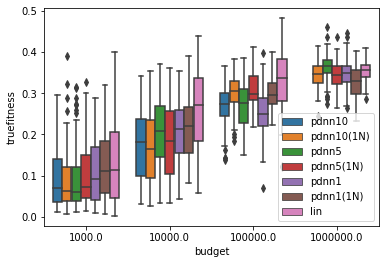

In [6]:
plt.clf()
sns.boxplot(x="budget", y="truefitness", hue="agent",
            data=data)
plt.legend()

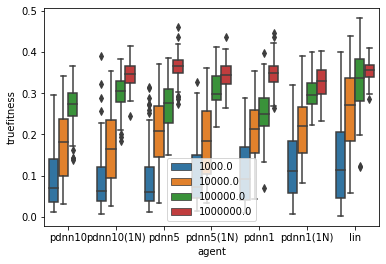

In [7]:
plt.clf()
sns.boxplot(x="agent", y="truefitness", hue="budget",
            data=data)
plt.legend()

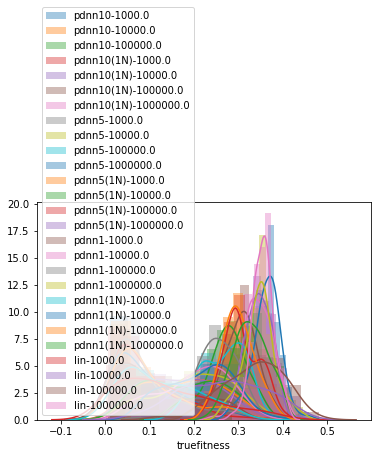

In [8]:
for a in range(len(agents)):
	l = agents[a]+'-'+str(budgets[a])
	aData = data[(data.agent==agents[a]) & (data.budget==budgets[a])]
	sns.distplot(aData["truefitness"], label=l) #or distplot

plt.legend()
#plt.savefig('ntbea_data.pdf')